# MOVIE DATA ANALYSIS


## Introduction

In this project, we will use pandas to clean up several datasets and perform some EDA, then perform statistical tests and interpret their results in order to help create a new movie studio.

## Overview and Business Understanding 

our company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Business understanding

our company wants to enter the movie production business but lacks industry experience. Your role is to analyze current market trends to guide their strategy.We have been tasked with analyzing the recently published movies trending in the market.Conduct surveys and provide our recommendations back to the Company. We have been assigned the task of taking a first look at the data and beginning to answer several key questions:

(i). Which genre of movies are doing well in the market?

(ii). How is the gross income and profits made?

### Challenges encountered

(1). Inconsistent data(data quality).

(2). large datasets 

(3). 

### Proposed Solution

(a). Clean and merge datasets to ensure reliability.

(b). Focus on 2008–2023 data to capture recent trends.

(c). Prioritize genres with high profit margins (e.g., action, animation) and directors with consistent hits.

(d). Use visualizations (e.g., histogram,bar charts) to communicate findings effectively.

### Brief Conclusion
By analyzing historical data, we can recommend data-driven strategies for the studio’s launch, minimizing risk while maximizing profitability. Key focus areas include genre selection, director partnerships, and audience targeting.

### Problem Statement
The company seeks to establish a new movie studio but lacks insights into what types of films resonate with audiences and generate revenue. Without understanding trends in genre profitability, director performance, or audience demographics, the studio risks investing in projects that may underperform. The challenge is to derive actionable insights from existing data to guide decision-making and ensure a competitive entry into the market.

### objectives

 (i). Finding the Best Performing Movie Genre in the Last 15 Years
 
 (ii). Finding the Best perfoming Director in movies in the last 15 years

 (iii). Identifying the Best Performing region 
       
       > loading the dataset to work with
       
       > cleaning the dataset.
       
       > filtering the most performing recent movies to work with

       > merging the datasets used

       > visualizations

       > hypothesis testing

#### hypothesis

(i). What are the top 5 highest-grossing movie genres in the past 15 years?

(ii). Which director has the most films in the top 10 highest-grossing films of the last 15 years?

(iii). Which region is performing best in the last 15 years?

## Data Understanding 

Several datasets have been provided for analysis ie IMDB,Rotten tomato,Numbers etc.Which are in different formats csv,Tsv,db and have data related to movies


Prior to each statistical test, you will need to perform some data preparation, which could include:


* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns


Import necessary libraries for analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sqlite3
import os
import gzip
import shutil
import seaborn as sns
import scipy.stats as stats

In [3]:

zipped_folder = r"C:\Users\HP\OneDrive\Desktop\MYPROJECT\zipped data"

# Files to unzip (from your screenshot)
files_to_unzip = [
    "rt.movie_info.tsv.gz",
    "tmdb.movies.csv.gz",
    "tn.movie_budgets.csv.gz",
    "bom.movie_gross.csv.gz",
]

for gz_file in files_to_unzip:
    # Full path to compressed file
    gz_path = os.path.join(zipped_folder, gz_file)
    
    # Remove .gz extension for output file
    output_file = os.path.join(zipped_folder, gz_file[:-3])  # removes last 3 chars (.gz)
    
  

In [4]:
data_folder = r"C:\Users\HP\OneDrive\Desktop\MYPROJECT\zipped data"

### i loading the numbers dataset

In [5]:
# Load the datasets
tn_movies = pd.read_csv(
        os.path.join(data_folder, "tn.movie_budgets.csv"),
        encoding='utf-8'
    )
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
# First, let's create a clean copy of the dataframe
clean_movies = tn_movies.copy()

In [9]:
#change monetary columns (remove $ and commas, convert to numeric)
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in money_cols:
    clean_movies[col] = (clean_movies[col]
                         .str.replace('$', '')
                         .str.replace(',', '')
                         .astype(float))
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [10]:
# Convert release_date to datetime
clean_movies['release_date'] = pd.to_datetime(clean_movies['release_date'])
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [11]:
# handling mising va;lues
clean_movies['domestic_gross'] = clean_movies['domestic_gross'].fillna(0)
clean_movies['worldwide_gross'] = clean_movies['worldwide_gross'].fillna(0)
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [12]:
#calculate profit and profit margin
#Profit = Worldwide Gross Revenue - Production Budget
#Profit_Margin = (Profit / Worldwide Gross Revenue) × 100
clean_movies['profit'] = clean_movies['worldwide_gross'] - clean_movies['production_budget']
clean_movies['profit_margin'] = (clean_movies['profit'] / clean_movies['worldwide_gross']) * 100
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,84.692106
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.733080
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-133.703598
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,75.925058
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-inf
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,97.505146
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-273.692078
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-inf


In [13]:
clean_movies.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit               0
profit_margin        0
dtype: int64

ii. Loading the imbd sql dataset

In [14]:
db_path = r"C:\Users\HP\Desktop\MYPROJECT\im.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [15]:
query="""
SELECT * FROM movie_basics LIMIT 5
"""
pd.read_sql_query(query,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
query = "SELECT * FROM movie_basics"
movie_basics = pd.read_sql_query(query, conn)

# Display info before cleaning
print(movie_basics.info())
print("\nMissing values:")
print(movie_basics.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None

Missing values:
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [17]:
clean_movie_basics = movie_basics.copy()

In [18]:
# Fill original_title with primary_title when missing (since they're often the same)
clean_movie_basics['original_title'] = clean_movie_basics['original_title'].fillna(
    clean_movie_basics['primary_title']
)
clean_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [19]:
runtime_median = clean_movie_basics['runtime_minutes'].median()
clean_movie_basics['runtime_minutes'] = clean_movie_basics['runtime_minutes'].fillna(runtime_median)
clean_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [20]:
clean_movie_basics.dropna()
clean_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [21]:
# Filter movies to only last 15 years (2009-2023)
current_year = pd.Timestamp.now().year
clean_movies = clean_movies[clean_movies['release_date'].dt.year >= (current_year - 15)]
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.733080
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-133.703598
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,75.925058
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,85.097242
...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-1.500000e+04,-inf
5771,72,2015-05-19,Family Motocross,10000.0,0.0,0.000000e+00,-1.000000e+04,-inf
5772,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,-96.335079
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-inf


In [22]:
clean_movie_basics.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [23]:
# Drop rows where 'genres' is missing
clean_movie_basics = clean_movie_basics.dropna(subset=['genres'])

In [24]:
clean_movie_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [25]:

combined = """SELECT *
                FROM principals
                JOIN movie_akas USING (movie_id)
                JOIN movie_basics USING (movie_id)
                JOIN movie_ratings USING (movie_id)
                JOIN persons USING (person_id);"""

combined_df = pd.read_sql_query(combined,conn)
combined_df.head()

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0323808,10,nm0059247,editor,None,None,1,May Day,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
1,tt0323808,10,nm0059247,editor,None,None,2,Cowboys for Christ,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
2,tt0323808,10,nm0059247,editor,None,None,3,The Wicker Tree,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
3,tt0323808,10,nm0059247,editor,None,None,4,The Wicker Tree,None,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
4,tt0323808,10,nm0059247,editor,None,None,5,Плетеное дерево,RU,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"


In [26]:
combined_df.copy()

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0323808,10,nm0059247,editor,None,None,1,May Day,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
1,tt0323808,10,nm0059247,editor,None,None,2,Cowboys for Christ,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
2,tt0323808,10,nm0059247,editor,None,None,3,The Wicker Tree,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
3,tt0323808,10,nm0059247,editor,None,None,4,The Wicker Tree,None,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
4,tt0323808,10,nm0059247,editor,None,None,5,Плетеное дерево,RU,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",1,Malchik Russkiy,RU,None,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor
2422862,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",2,A Russian Youth,XWW,en,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor
2422863,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",3,Malchik russkiy,None,None,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor
2422864,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",4,Мальчик русский,RU,None,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor


In [27]:
combined_df.isnull().sum()

movie_id                    0
ordering                    0
person_id                   0
category                    0
job                   1757131
characters            1468512
ordering                    0
title                       0
region                 393739
language              2073586
types                  974092
attributes            2301142
is_original_title           0
primary_title               0
original_title              0
start_year                  0
runtime_minutes         95004
genres                   9057
averagerating               0
numvotes                    0
primary_name                0
birth_year            1367955
death_year            2380448
primary_profession      52454
dtype: int64

In [28]:
# Find columns to drop using lambda
cols_to_drop = combined_df.columns[combined_df.isnull().apply(lambda x: x.mean() > 0.4)]

# Drop these columns
combined_df_clean = combined_df.drop(columns=cols_to_drop)
combined_df_clean.isnull().sum()


movie_id                   0
ordering                   0
person_id                  0
category                   0
ordering                   0
title                      0
region                393739
is_original_title          0
primary_title              0
original_title             0
start_year                 0
runtime_minutes        95004
genres                  9057
averagerating              0
numvotes                   0
primary_name               0
primary_profession     52454
dtype: int64

In [29]:
combined_df_clean = combined_df_clean.dropna()
combined_df_clean.isnull().sum()

movie_id              0
ordering              0
person_id             0
category              0
ordering              0
title                 0
region                0
is_original_title     0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
primary_name          0
primary_profession    0
dtype: int64

In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422866 entries, 0 to 2422865
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   movie_id            object 
 1   ordering            int64  
 2   person_id           object 
 3   category            object 
 4   job                 object 
 5   characters          object 
 6   ordering            int64  
 7   title               object 
 8   region              object 
 9   language            object 
 10  types               object 
 11  attributes          object 
 12  is_original_title   float64
 13  primary_title       object 
 14  original_title      object 
 15  start_year          int64  
 16  runtime_minutes     float64
 17  genres              object 
 18  averagerating       float64
 19  numvotes            int64  
 20  primary_name        object 
 21  birth_year          float64
 22  death_year          float64
 23  primary_profession  object 
dtypes: float64(5), int64(4),

In [31]:
directors_query = "SELECT * FROM directors"
directors = pd.read_sql_query(directors_query, conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [32]:
# Create a clean copy
clean_directors = directors.copy()

In [33]:
clean_directors.drop_duplicates()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [34]:
# SQL query to read the persons table
persons = "SELECT * FROM persons;"
persons_df = pd.read_sql_query(persons, conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


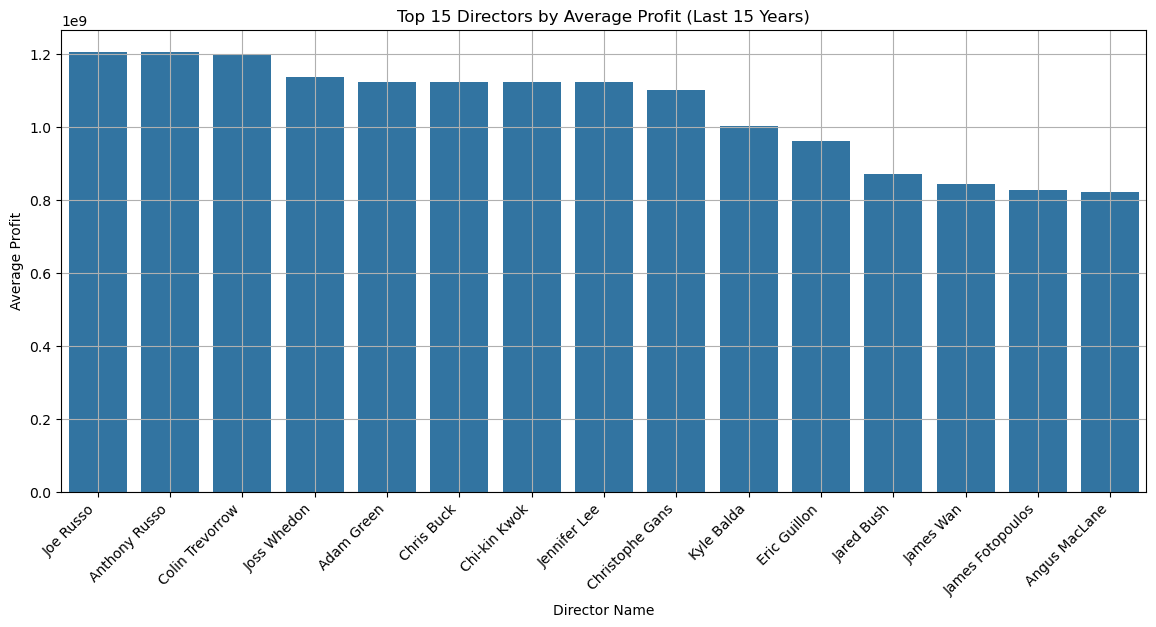

In [35]:
# Merge with directors and persons data
director_query = """
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.start_year,
    p.primary_name AS director_name,
    mr.averagerating,
    mr.numvotes
FROM 
    movie_basics mb
JOIN 
    directors d ON mb.movie_id = d.movie_id
JOIN 
    persons p ON d.person_id = p.person_id
JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE 
    mb.start_year >= strftime('%Y', date('now', '-15 years'))
"""
director_data = pd.read_sql_query(director_query, conn)

# Merge with financial data
director_performance = pd.merge(clean_movies, director_data, left_on='movie', right_on='primary_title', how='inner')

# Group by director and calculate performance metrics
top_directors = director_performance.groupby('director_name').agg({
    'worldwide_gross': 'mean',
    'profit': 'mean',
    'averagerating': 'mean',
    'movie': 'count'
}).sort_values('profit', ascending=False)
# Visualizing top 15 directors with a bar plot
plt.figure(figsize=(14,6))
top_15_directors = top_directors.head(15).reset_index()

sns.barplot(x='director_name', y='profit', data=top_15_directors)
plt.title('Top 15 Directors by Average Profit (Last 15 Years)')
plt.xlabel('Director Name')
plt.ylabel('Average Profit')
plt.xticks(rotation=45, ha='right')  
plt.grid(True)
plt.show()


### iii. Loading the rotten tomato dataset

In [36]:
# Load the dataset
rt = {}

# Now load the data into rt['movie_info']
rt['movie_info'] = pd.read_csv(
    os.path.join(data_folder, "rt.movie_info.tsv"),
    encoding='utf-8',
    sep='\t'  # For TSV format
)
rt['movie_info']

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [37]:
rt['movie_info'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [38]:
rt['movie_info'].describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [39]:
rt['movie_info'].isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [40]:
#dropping and fill null/missing values
rt['movie_info'] = rt['movie_info'].fillna({
    'synopsis': 'Unknown',  
    'rating': 0,           
    'genre': 'Unknown',     
    'director': 'Unknown',  
    'writer': 'Unknown',    
    'theater_date': 'Unknown', 
    'dvd_date': 'Unknown',
    'currency': 'Unknown',
    'box_office': 0,        
    'runtime': 0,           
    'studio': 'Unknown'
})

rt['movie_info'].isnull().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [41]:
rt['movie_info'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1555    False
1556    False
1557    False
1558    False
1559    False
Length: 1560, dtype: bool

In [42]:
# Load the datasets
bom_movies = pd.read_csv(
        os.path.join(data_folder, "bom.movie_gross.csv.gz"),
        encoding='utf-8'
    )
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [43]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [44]:
# Load the datasets
tmdb_movies = pd.read_csv(
        os.path.join(data_folder, "tmdb.movies.csv.gz"),
        encoding='utf-8'
    )
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [66]:
# lets merge the tmdb_movies and bom_movies datasets
merged= pd.merge(tmdb_movies, bom_movies, left_on='title', right_on='title', how='inner')
merged.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


In [46]:
merged.info()
merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  studio             2702 non-null   object 
 11  domestic_gross     2682 non-null   float64
 12  foreign_gross      1723 non-null   object 
 13  year               2703 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 295.8+ KB


Unnamed: 0             0
genre_ids              0
id                     0
original_language      0
original_title         0
popularity             0
release_date           0
title                  0
vote_average           0
vote_count             0
studio                 1
domestic_gross        21
foreign_gross        980
year                   0
dtype: int64

In [47]:
merged.dtypes


Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
studio                object
domestic_gross       float64
foreign_gross         object
year                   int64
dtype: object

In [48]:
# Filling missing studio names
merged['studio'] = merged['studio'].fillna('Unknown')
# Filling missing domestic_gross with 0
merged['domestic_gross'] = merged['domestic_gross'].fillna(0)
#Converting foreign_gross to numeric  and filling missing with 0
merged['foreign_gross'] = pd.to_numeric(merged['foreign_gross'], errors='coerce')
merged['foreign_gross'] = merged['foreign_gross'].fillna(0)
merged.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

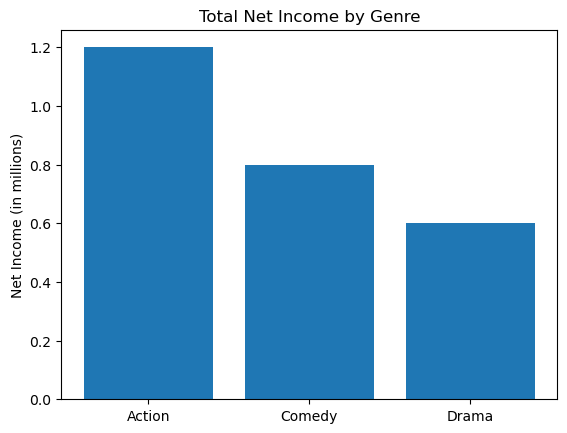

In [49]:
# creating a new column for net income.
# Net Income = Domestic Gross + Foreign Gross
merged['net_income'] = merged['domestic_gross'] + merged['foreign_gross']
# Grouping by genre and calculating the total net income for each genre
genre_income = merged.groupby('genre_ids')['net_income'].sum().sort_values(ascending=False)
# plotting
genres = ["Action", "Comedy", "Drama"]
net_income = [1.2, 0.8, 0.6]

plt.bar(genres, net_income)
plt.title("Total Net Income by Genre")
plt.ylabel("Net Income (in millions)")
plt.show()


In [50]:
# Merging the two DataFrames
merged_df_1 = pd.merge(merged,clean_movies, left_on='title', right_on='movie')
merged_df_1.head()


,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,year,net_income,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross,profit,profit_margin
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,4.949000e+08,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,4.948710e+08,329870992.0,66.657977
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,2010,6.239000e+08,15,2010-05-07,Iron Man 2,170000000.0,312433331.0,6.211564e+08,451156389.0,72.631691
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,2010,8.283000e+08,38,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08,675524642.0,80.850355
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,2010,1.067000e+09,47,2010-06-18,Toy Story 3,200000000.0,415004880.0,1.068880e+09,868879522.0,81.288817
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,2010,5.431000e+08,50,2010-07-09,Despicable Me,69000000.0,251513985.0,5.434646e+08,474464573.0,87.303680


In [51]:
merged_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1378 non-null   int64         
 1   genre_ids          1378 non-null   object        
 2   id_x               1378 non-null   int64         
 3   original_language  1378 non-null   object        
 4   original_title     1378 non-null   object        
 5   popularity         1378 non-null   float64       
 6   release_date_x     1378 non-null   object        
 7   title              1378 non-null   object        
 8   vote_average       1378 non-null   float64       
 9   vote_count         1378 non-null   int64         
 10  studio             1378 non-null   object        
 11  domestic_gross_x   1378 non-null   float64       
 12  foreign_gross      1378 non-null   float64       
 13  year               1378 non-null   int64         
 14  net_inco

In [52]:
#lets see how many rows we would have if we only merged gross and budget
merged_df_2 = pd.merge( bom_movies,clean_movies,left_on='title',right_on='movie')
merged_df_2.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,profit,profit_margin
0,Toy Story 3,BV,415000000.0,652000000,2010,47,2010-06-18,Toy Story 3,200000000.0,415004880.0,1.068880e+09,868879522.0,81.288817
1,Inception,WB,292600000.0,535700000,2010,38,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08,675524642.0,80.850355
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,2010-05-21,Shrek Forever After,165000000.0,238736787.0,7.562447e+08,591244673.0,78.181664
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,2010-06-30,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08,638102828.0,90.369675
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,2010-05-07,Iron Man 2,170000000.0,312433331.0,6.211564e+08,451156389.0,72.631691


In [53]:
merged_df_2.isnull().sum()

title                  0
studio                 1
domestic_gross_x       2
foreign_gross        158
year                   0
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
profit                 0
profit_margin          0
dtype: int64

In [54]:
merged_df_2.dtypes

title                        object
studio                       object
domestic_gross_x            float64
foreign_gross                object
year                          int64
id                            int64
release_date         datetime64[ns]
movie                        object
production_budget           float64
domestic_gross_y            float64
worldwide_gross             float64
profit                      float64
profit_margin               float64
dtype: object

In [55]:
# Ensuring foreign_gross is a string 
merged_df_2['foreign_gross'] = merged_df_2['foreign_gross'].astype(str)

# Removing commas and currency symbols and convert to float
merged_df_2['foreign_gross'] = (
    merged_df_2['foreign_gross']
    .str.replace('[$,]', '', regex=True)
    .astype(float)
)

# Filling any NaN values in foreign_gross with 0
merged_df_2['foreign_gross'] = merged_df_2['foreign_gross'].fillna(0)

# Filling missing values in domestic_gross_x with the median value
median_x = merged_df_2['domestic_gross_x'].median()
merged_df_2['domestic_gross_x'] = merged_df_2['domestic_gross_x'].fillna(median_x)

# Filling missing studio names with 'Unknown'
merged_df_2['studio'] = merged_df_2['studio'].fillna("Unknown")
merged_df_2.isnull().sum()


title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
profit               0
profit_margin        0
dtype: int64

In [56]:
merged_df_1.columns

Index(['Unnamed: 0', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'popularity', 'release_date_x', 'title',
       'vote_average', 'vote_count', 'studio', 'domestic_gross_x',
       'foreign_gross', 'year', 'net_income', 'id_y', 'release_date_y',
       'movie', 'production_budget', 'domestic_gross_y', 'worldwide_gross',
       'profit', 'profit_margin'],
      dtype='object')

In [57]:
numeric_cols = merged_df_2.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['domestic_gross_x', 'foreign_gross', 'year', 'id', 'production_budget', 'domestic_gross_y', 'worldwide_gross', 'profit', 'profit_margin']


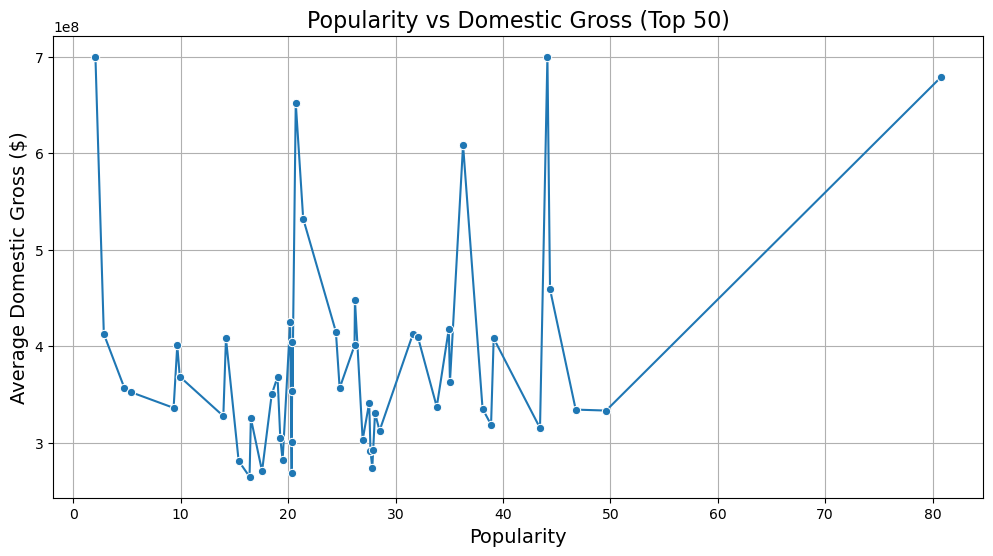

In [58]:
# Group by popularity and calculate mean domestic gross
pop_domGross = merged_df_1.groupby('popularity')['domestic_gross_x'].mean().sort_values(ascending=False)

# Take top 50
pop_domGross_top_50 = pop_domGross.head(50)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=pop_domGross_top_50.index, y=pop_domGross_top_50.values, marker='o')

ax.set_title('Popularity vs Domestic Gross (Top 50)', fontsize=16)
ax.set_xlabel('Popularity', fontsize=14)
ax.set_ylabel('Average Domestic Gross ($)', fontsize=14)
ax.grid(True)

plt.show()


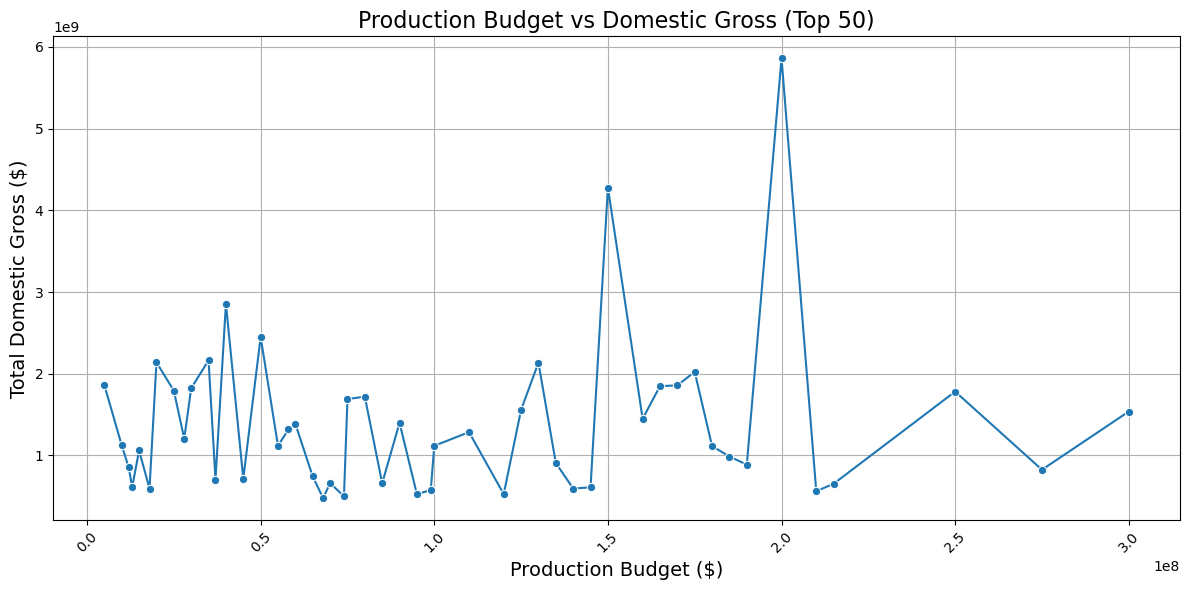

In [59]:
# Grouping by production budget and summing gross
budget_vs_gross = merged_df_1.groupby('production_budget')['domestic_gross_x'].sum().sort_values(ascending=False)

# Taking top 50
budget_vs_gross_top_50 = budget_vs_gross.head(50)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=budget_vs_gross_top_50.index, y=budget_vs_gross_top_50.values, marker='o')

ax.set_title('Production Budget vs Domestic Gross (Top 50)', fontsize=16)
ax.set_xlabel('Production Budget ($)', fontsize=14)
ax.set_ylabel('Total Domestic Gross ($)', fontsize=14)
ax.grid(True)

# Optional: Rotate x labels if needed
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [60]:
imdb_gross_combine = pd.merge(combined_df,bom_movies,on='title')
imdb_gross_combine

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession,studio,domestic_gross,foreign_gross,year
0,tt0475290,10,nm0005683,cinematographer,director of photography,None,24,"Hail, Caesar!",GB,None,...,6.3,111422,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous",Uni.,30500000.0,33100000,2016
1,tt0475290,10,nm0005683,cinematographer,director of photography,None,29,"Hail, Caesar!",None,None,...,6.3,111422,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous",Uni.,30500000.0,33100000,2016
2,tt0475290,1,nm0000982,actor,None,"[""Eddie Mannix""]",24,"Hail, Caesar!",GB,None,...,6.3,111422,Josh Brolin,1968.0,NaN,"actor,producer,writer",Uni.,30500000.0,33100000,2016
3,tt0475290,1,nm0000982,actor,None,"[""Eddie Mannix""]",29,"Hail, Caesar!",None,None,...,6.3,111422,Josh Brolin,1968.0,NaN,"actor,producer,writer",Uni.,30500000.0,33100000,2016
4,tt0475290,2,nm0000123,actor,None,"[""Baird Whitlock""]",24,"Hail, Caesar!",GB,None,...,6.3,111422,George Clooney,1961.0,NaN,"actor,producer,director",Uni.,30500000.0,33100000,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104647,tt8923482,7,nm4388506,composer,None,None,3,Born in China,US,None,...,7.5,103,Nathan Halpern,NaN,NaN,"composer,music_department,soundtrack",BV,13900000.0,11200000,2017
104648,tt8923482,8,nm1848623,composer,None,None,2,Born in China,None,None,...,7.5,103,Chris Ruggiero,NaN,NaN,"composer,music_department,sound_department",BV,13900000.0,11200000,2017
104649,tt8923482,8,nm1848623,composer,None,None,3,Born in China,US,None,...,7.5,103,Chris Ruggiero,NaN,NaN,"composer,music_department,sound_department",BV,13900000.0,11200000,2017
104650,tt8923482,9,nm4190618,cinematographer,director of photography,None,2,Born in China,None,None,...,7.5,103,Yuanchen Liu,NaN,NaN,"cinematographer,producer,director",BV,13900000.0,11200000,2017


In [61]:
imdb_gross_combine.isnull().sum()

movie_id                   0
ordering                   0
person_id                  0
category                   0
job                    65644
characters             62699
ordering                   0
title                      0
region                 22783
language               87352
types                  23989
attributes            101254
is_original_title          0
primary_title              0
original_title             0
start_year                 0
runtime_minutes          475
genres                    67
averagerating              0
numvotes                   0
primary_name               0
birth_year             40637
death_year            102030
primary_profession       720
studio                    80
domestic_gross           614
foreign_gross          33579
year                       0
dtype: int64

In [62]:
# First, check the data types
imdb_gross_combine.dtypes

movie_id               object
ordering                int64
person_id              object
category               object
job                    object
characters             object
ordering                int64
title                  object
region                 object
language               object
types                  object
attributes             object
is_original_title     float64
primary_title          object
original_title         object
start_year              int64
runtime_minutes       float64
genres                 object
averagerating         float64
numvotes                int64
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
studio                 object
domestic_gross        float64
foreign_gross          object
year                    int64
dtype: object

In [63]:
# Converting foreign_gross to numeric, coercing errors (like strings) into NaN
imdb_gross_combine['foreign_gross'] = pd.to_numeric(imdb_gross_combine['foreign_gross'], errors='coerce')

# Filling missing domestic_gross with 0
imdb_gross_combine['domestic_gross'] = imdb_gross_combine['domestic_gross'].fillna(0)

# Filling missing foreign_gross with 0
imdb_gross_combine['foreign_gross'] = imdb_gross_combine['foreign_gross'].fillna(0)
imdb_gross_combine.isnull().sum()


movie_id                   0
ordering                   0
person_id                  0
category                   0
job                    65644
characters             62699
ordering                   0
title                      0
region                 22783
language               87352
types                  23989
attributes            101254
is_original_title          0
primary_title              0
original_title             0
start_year                 0
runtime_minutes          475
genres                    67
averagerating              0
numvotes                   0
primary_name               0
birth_year             40637
death_year            102030
primary_profession       720
studio                    80
domestic_gross             0
foreign_gross              0
year                       0
dtype: int64

In [64]:
# Drop rows with missing values
imdb_gross_combine_cleaned = imdb_gross_combine.dropna()
imdb_gross_combine_cleaned.isnull().sum()



movie_id              0
ordering              0
person_id             0
category              0
job                   0
characters            0
ordering              0
title                 0
region                0
language              0
types                 0
attributes            0
is_original_title     0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
primary_name          0
birth_year            0
death_year            0
primary_profession    0
studio                0
domestic_gross        0
foreign_gross         0
year                  0
dtype: int64

In [65]:
imdb_gross_combine.head()

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession,studio,domestic_gross,foreign_gross,year
0,tt0475290,10,nm0005683,cinematographer,director of photography,None,24,"Hail, Caesar!",GB,None,...,6.3,111422,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous",Uni.,30500000.0,33100000.0,2016
1,tt0475290,10,nm0005683,cinematographer,director of photography,None,29,"Hail, Caesar!",None,None,...,6.3,111422,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous",Uni.,30500000.0,33100000.0,2016
2,tt0475290,1,nm0000982,actor,None,"[""Eddie Mannix""]",24,"Hail, Caesar!",GB,None,...,6.3,111422,Josh Brolin,1968.0,NaN,"actor,producer,writer",Uni.,30500000.0,33100000.0,2016
3,tt0475290,1,nm0000982,actor,None,"[""Eddie Mannix""]",29,"Hail, Caesar!",None,None,...,6.3,111422,Josh Brolin,1968.0,NaN,"actor,producer,writer",Uni.,30500000.0,33100000.0,2016
4,tt0475290,2,nm0000123,actor,None,"[""Baird Whitlock""]",24,"Hail, Caesar!",GB,None,...,6.3,111422,George Clooney,1961.0,NaN,"actor,producer,director",Uni.,30500000.0,33100000.0,2016
